# Machine Learning Project- Iris Flower Classification

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Reading Data

In [2]:
iris = pd.read_csv('Iris.csv')

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.shape

(150, 6)

In [5]:
iris.info

<bound method DataFrame.info of       Id  SepalLengthCm  ...  PetalWidthCm         Species
0      1            5.1  ...           0.2     Iris-setosa
1      2            4.9  ...           0.2     Iris-setosa
2      3            4.7  ...           0.2     Iris-setosa
3      4            4.6  ...           0.2     Iris-setosa
4      5            5.0  ...           0.2     Iris-setosa
..   ...            ...  ...           ...             ...
145  146            6.7  ...           2.3  Iris-virginica
146  147            6.3  ...           1.9  Iris-virginica
147  148            6.5  ...           2.0  Iris-virginica
148  149            6.2  ...           2.3  Iris-virginica
149  150            5.9  ...           1.8  Iris-virginica

[150 rows x 6 columns]>

# Removing ID column

In [6]:
iris.drop('Id',axis=1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Some EDA with Iris

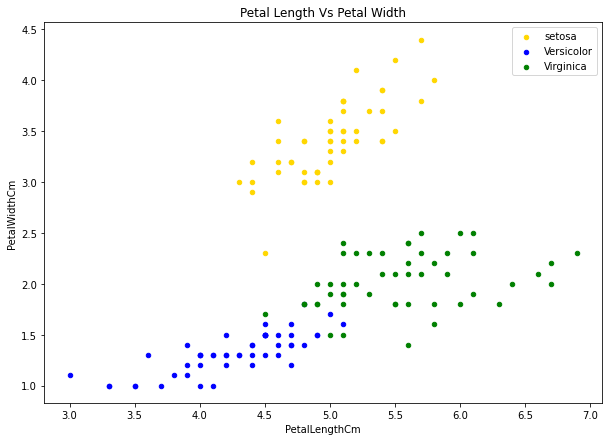

In [7]:
fig = iris[iris.Species == 'Iris-setosa'].plot(kind = 'scatter',x = 'SepalLengthCm',y='SepalWidthCm',color='gold',label='setosa')
iris[iris.Species == 'Iris-versicolor'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='blue', label='Versicolor', ax=fig)
iris[iris.Species == 'Iris-virginica'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='green', label='Virginica', ax=fig)

fig.set_title('Petal Length Vs Petal Width')
fig=plt.gcf()
fig.set_size_inches(10, 7)
plt.show()

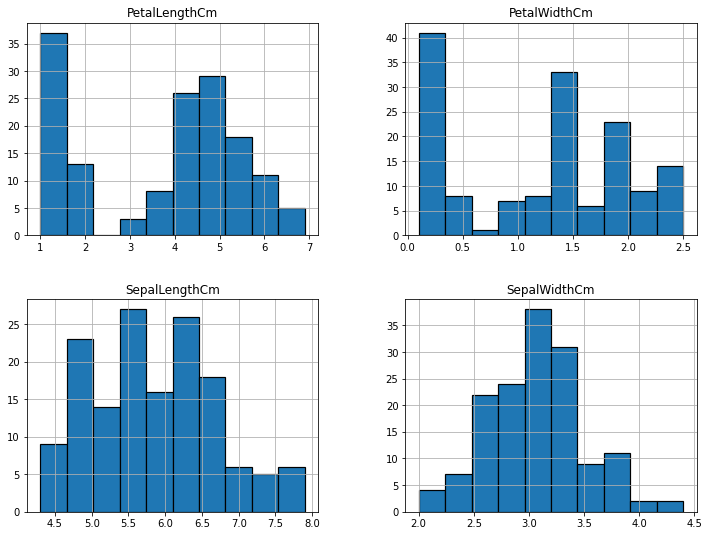

In [8]:
iris.drop('Id',axis=1).hist(edgecolor='black', linewidth=1.2)
fig = plt.gcf()
fig.set_size_inches(12,9)
plt.show()

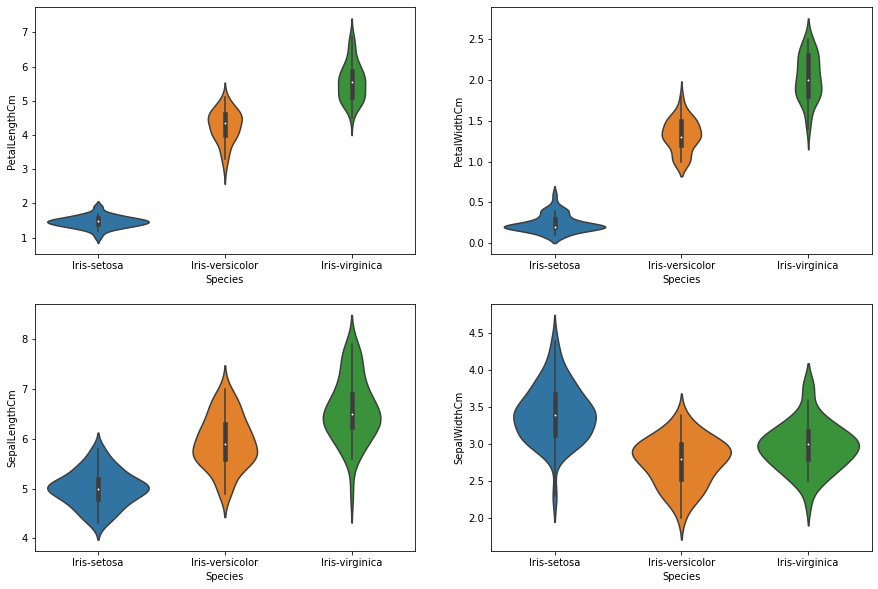

In [9]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(data=iris,x='Species',y='PetalLengthCm')
plt.subplot(2,2,2)
sns.violinplot(data=iris,x='Species',y='PetalWidthCm')
plt.subplot(2,2,3)
sns.violinplot(data=iris,x='Species',y='SepalLengthCm')
plt.subplot(2,2,4)
sns.violinplot(data=iris,x='Species',y='SepalWidthCm')

# The given problem is a Classification Problem so we need to use Classification Algorithims to build a model

 In this dataset                                                                                                               
 Features: PetalLengthCm ,PetalWidthCm ,SepalLengthCm ,SepalWidthCm                                                             
 Target variables: Iris-setosa,Iris-versicolor,Iris-virginica


In [10]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
from sklearn.model_selection import train_test_split # to split the dataset for training and testing 
from sklearn.neighbors import KNeighborsClassifier # KNN classifier
from sklearn import svm # for suport vector machine algorithm
from sklearn import metrics # for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier # for using DTA

Steps To Be followed When Applying an Algorithm

Split the dataset into training and testing dataset. The testing dataset is generally smaller than training one as it will help in training the model better.

Select any algorithm based on the problem (classification or regression) whatever you feel may be good. Then pass the training dataset to the algorithm to train it. We use the .fit() method Then pass the testing data to the trained algorithm to predict the outcome. We use the .predict() method. We then check the accuracy by passing the predicted outcome and the actual output to the model.

## Splitting the data into Training and Testing Dataset

In [11]:
train,test = train_test_split(iris,test_size=0.3)#test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%

In [12]:
train.shape

(105, 6)

In [13]:
test.shape

(45, 6)

In [14]:
X_train = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking the training data features
y_train = train.Species # output of the training data
X_test = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] # taking test data feature
y_test = test.Species # output value of the test data

In [15]:
X_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
65,6.7,3.1,4.4,1.4
82,5.8,2.7,3.9,1.2
40,5.0,3.5,1.3,0.3
15,5.7,4.4,1.5,0.4
44,5.1,3.8,1.9,0.4


In [16]:
y_train.head()

65    Iris-versicolor
82    Iris-versicolor
40        Iris-setosa
15        Iris-setosa
44        Iris-setosa
Name: Species, dtype: object

In [17]:
X_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
148,6.2,3.4,5.4,2.3
53,5.5,2.3,4.0,1.3
1,4.9,3.0,1.4,0.2
126,6.2,2.8,4.8,1.8
145,6.7,3.0,5.2,2.3


In [18]:
y_test.head()

148     Iris-virginica
53     Iris-versicolor
1          Iris-setosa
126     Iris-virginica
145     Iris-virginica
Name: Species, dtype: object

#### Visualizing decision trees
For clear understanding of the dataset lets visualize it in decision trees

In [27]:
clf = DecisionTreeClassifier().fit(X_train, y_train)

In [ ]:
from adspy_shared_utilities import plot_decision_tree
features = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
target = ['Iris-setosa','Iris-versicolor','Iris-virginica']
plot_decision_tree(clf, features,target)

In [ ]:
from adspy_shared_utilities import plot_feature_importances

plt.figure(figsize=(10,4), dpi=80)
plot_feature_importances(clf, features)
plt.show()

print('Feature importances: {}'.format(clf.feature_importances_))

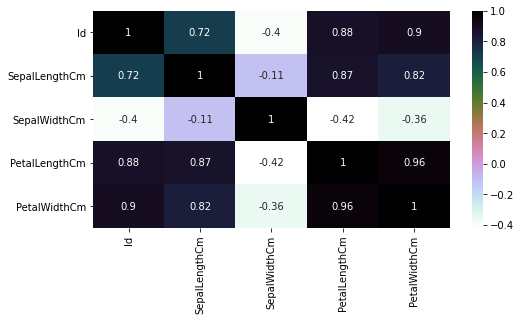

In [30]:
plt.figure(figsize=(8,4))
sns.heatmap(iris.corr(), annot=True, cmap='cubehelix_r') 
# draws heatmap with input as correlation matrix calculated by iris.corr() 
plt.show()

Observation
The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated
We will use all the features for training the algorithm and check the accuracy.

Then we will use 1 Petal Feature and 1 Sepal Feature to check the accuracy of the algorithm as we are using only 2 features that are not correlated. Thus we can have a variance in the dataset which may help in better accuracy

## Checking accuracy for different models using all the features

### Decision trees

In [32]:
dclf = DecisionTreeClassifier()
dclf.fit(X_train,y_train)
dprediction = dclf.predict(X_test)
print('The accuracy of Decision Tree is: ', metrics.accuracy_score(dprediction, y_test))

The accuracy of Decision Tree is:  0.9555555555555556


### Logistic Regression 

In [33]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lrprediction = lr.predict(X_test)
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(lrprediction, y_test))

The accuracy of Logistic Regression is:  0.9777777777777777


## Support Vector Machine SVM

In [34]:
sclf = svm.SVC()
sclf.fit(X_train,y_train)
sprediction = sclf.predict(X_test)
print('The accuracy of the SVM is: ', metrics.accuracy_score(sprediction, y_test))

The accuracy of the SVM is:  0.9777777777777777


### K-Nearest Neighbors

In [35]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
kprediction = knn.predict(X_test)
print('The accuracy of KNN is: ', metrics.accuracy_score(kprediction, y_test))

The accuracy of KNN is:  0.9777777777777777


### Let's check the accuracy for various values of n for K-Nearest nerighbours


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  


([<matplotlib.axis.XTick at 0x7f11849e0208>,
 <a list of 10 Text major ticklabel objects>)

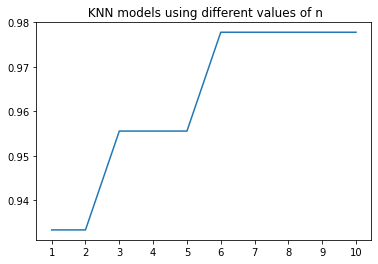

In [36]:
a_index = list(range(1,11))
a = pd.Series()
for i in list(range(1,11)):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    prediction = knn.predict(X_test)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, y_test)))
plt.plot(a_index, a)
x = [1,2,3,4,5,6,7,8,9,10]
plt.title(' KNN models using different values of n')
plt.xticks(x)

# Check with an Example

In [42]:
example_flower = [[36,30,39,0.7]]
dprediction = dclf.predict(example_flower) #Using DecisionTree algorithim
print('Predicted flower type for ', example_flower, ' is ',iris.Species[dprediction])

Predicted flower type for  [[36, 30, 39, 0.7]]  is  Iris-setosa    NaN
Name: Species, dtype: object


## Now we will use Petals and Sepals Seperately

### Creating Petals And Sepals Training Data

In [43]:
petal = iris[['PetalLengthCm','PetalWidthCm','Species']]
sepal = iris[['SepalLengthCm','SepalWidthCm','Species']]

In [44]:
#Petals
train_p,test_p = train_test_split(petal,test_size=0.3,random_state=3)
X_train_p = train_p[['PetalWidthCm','PetalLengthCm']]
y_train_p = train_p.Species
X_test_p = test_p[['PetalWidthCm','PetalLengthCm']]
y_test_p = test_p.Species

In [45]:
# Sepals
train_s,test_s = train_test_split(sepal,test_size=0.3,random_state=3)
X_train_s = train_s[['SepalWidthCm','SepalLengthCm']]
y_train_s = train_s.Species
X_test_s = test_s[['SepalWidthCm','SepalLengthCm']]
y_test_s = test_s.Species

## Decision Tree

In [46]:
dclf = DecisionTreeClassifier()
dclf.fit(X_train_p,y_train_p)
dprediction = dclf.predict(X_test_p)
print('The accuracy of Decision Tree using Petals is: ', metrics.accuracy_score(dprediction, y_test_p))
dclf.fit(X_train_s,y_train_s)
dprediction = dclf.predict(X_test_s)
print('The accuracy of Decision Tree using Sepals is: ', metrics.accuracy_score(dprediction, y_test_s))

The accuracy of Decision Tree using Petals is:  0.9555555555555556
The accuracy of Decision Tree using Sepals is:  0.6444444444444445


## Logistic Regression

In [47]:
lr = LogisticRegression()
lr.fit(X_train_p,y_train_p)
lrprediction = lr.predict(X_test_p)
print('The accuracy of Logistic Regression using Petals is: ', metrics.accuracy_score(lrprediction, y_test_p))
lr.fit(X_train_s,y_train_s)
lrprediction = lr.predict(X_test_s)
print('The accuracy of Logistic Regression using Sepals is: ', metrics.accuracy_score(lrprediction, y_test_s))

The accuracy of Logistic Regression using Petals is:  0.9777777777777777
The accuracy of Logistic Regression using Sepals is:  0.7777777777777778


## SVM Algorithm

In [48]:
sclf = svm.SVC()
sclf.fit(X_train_p,y_train_p)
sprediction = sclf.predict(X_test_p)
print('The accuracy of the SVM using Petals is: ', metrics.accuracy_score(sprediction, y_test_p))
sclf.fit(X_train_s,y_train_s)
sprediction = sclf.predict(X_test_s)
print('The accuracy of the SVM using Sepalsis: ', metrics.accuracy_score(sprediction, y_test_s))

The accuracy of the SVM using Petals is:  0.9555555555555556
The accuracy of the SVM using Sepalsis:  0.8


## K-Nearest Neighbors

In [49]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train_p,y_train_p)
kprediction = knn.predict(X_test_p)
print('The accuracy of KNN using Petals is: ', metrics.accuracy_score(kprediction, y_test_p))
knn.fit(X_train_s,y_train_s)
kprediction = knn.predict(X_test_s)
print('The accuracy of KNN using Sepals is: ', metrics.accuracy_score(kprediction, y_test_s))

The accuracy of KNN using Petals is:  0.9777777777777777
The accuracy of KNN using Sepals is:  0.7333333333333333


# Check with an example

In [50]:
example_flower = [[36,30]]
dprediction = dclf.predict(example_flower) #Using DecisionTree algorithim
print('Predicted flower type for ', example_flower, ' is ',iris.Species[dprediction])

Predicted flower type for  [[36, 30]]  is  Iris-virginica    NaN
Name: Species, dtype: object


### Observations:

- Using Petals over Sepal for training the data gives a much better accuracy.
- This was expected as we saw in the heatmap above that the correlation between the Sepal Width and Length was very low whereas     the correlation between Petal Width and Length was very high.